In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
input_csv_file = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

HR_data = pd.read_csv(input_csv_file)

In [3]:
HR_data.rename(columns={'ï»¿Age':'Age'},inplace=True)

In [4]:
HR_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Verificando Qualidade dos Dados

In [5]:
HR_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
HR_data.duplicated().sum()

0

In [7]:
pd.DataFrame([[i, len(HR_data[i].unique())]for i in HR_data.columns], columns=['Variable','Unique Values']).set_index('Variable')

,Unique Values
Variable,
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


### Analise de Correlação entre as Features


In [8]:
HR_data = HR_data.drop(columns=['EmployeeCount','StandardHours','Over18'])


##### Transformando uma coluna de String em valores numericos

In [9]:
HR_data = HR_data.copy()                                     # Create copy of pandas DataFrame
HR_data['Attrition'] = HR_data['Attrition'].map({'Yes': 1, 'No': 0})      # Replace string by boolean
HR_data['Attrition'] = pd.to_numeric(HR_data['Attrition'])

In [10]:
HR_data_extension = pd.get_dummies(HR_data, columns= ['BusinessTravel','EducationField','Gender','Department','JobRole','MaritalStatus','OverTime'])

In [11]:
HR_data_extension.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0


In [12]:
columns = HR_data_extension.columns.to_list()
columns = columns[0:1] + columns[2:] + columns[1:2]
HR_data_extension = HR_data_extension[columns]
HR_data_extension.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,1,0,1,0,0


In [13]:
# porcentagem para undersampling
porc = 0.5

# separa as classes em diferentes dataframes
df_classe0 = HR_data_extension[HR_data_extension['Attrition'].values ==0]
df_classe1 = HR_data_extension[HR_data_extension['Attrition'].values ==1]

# undersampling de 70% na classe 0
df_classe0_under = df_classe0.sample(frac=porc , random_state=10)

# junta as classes 0 e 1 novamente
df_under = pd.concat([df_classe0_under, df_classe1])

# embaralha os dados novamente
df_under = df_under.sample(frac=1, random_state=10)

In [14]:
df_under.Attrition.value_counts()

0    616
1    237
Name: Attrition, dtype: int64

In [15]:
# porcentagem para oversampling
porc = 1.8 #cria cópia de 50% dos dados

# separa as classes em diferentes dataframes
df_classe0 = df_under[df_under['Attrition']==0]
df_classe1 = df_under[df_under['Attrition']==1]

# oversampling na classe 1. Precisa usar o parâmetro replace
df_classe1_over = df_classe1.sample(frac=porc, replace=True, random_state=10)

# junta as classes 0 e 1 novamente
df_over = pd.concat([df_classe0, df_classe1_over])

# embaralha os dados
df_over = df_over.sample(frac=1, random_state=10)

In [16]:
df_over.Attrition.value_counts()

0    616
1    427
Name: Attrition, dtype: int64

In [17]:
X = df_over.drop(columns="Attrition")
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
922,44,1199,4,2,1288,3,92,4,5,1,...,0,0,0,0,0,1,0,0,1,0
277,38,322,7,2,382,1,44,4,2,1,...,0,0,0,1,0,1,0,0,0,1
1025,24,1476,4,1,1445,4,42,3,2,3,...,0,0,0,1,0,0,1,0,0,1
687,36,938,2,4,958,3,79,3,1,3,...,0,0,0,0,0,0,0,1,1,0
1176,49,301,22,4,1655,1,72,3,4,2,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,32,1109,29,4,1046,4,69,3,1,3,...,0,0,0,0,0,0,0,1,1,0
610,27,269,5,1,844,3,42,2,3,4,...,0,1,0,0,0,1,0,0,0,1
1290,34,234,9,4,1807,4,93,3,2,1,...,0,0,0,0,0,0,1,0,1,0
711,29,906,10,3,994,4,92,2,1,1,...,0,0,1,0,0,0,0,1,0,1


In [18]:
y = df_over['Attrition']
y

922     0
277     0
1025    0
687     0
1176    0
       ..
756     0
610     0
1290    1
711     1
442     0
Name: Attrition, Length: 1043, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

<AxesSubplot: >

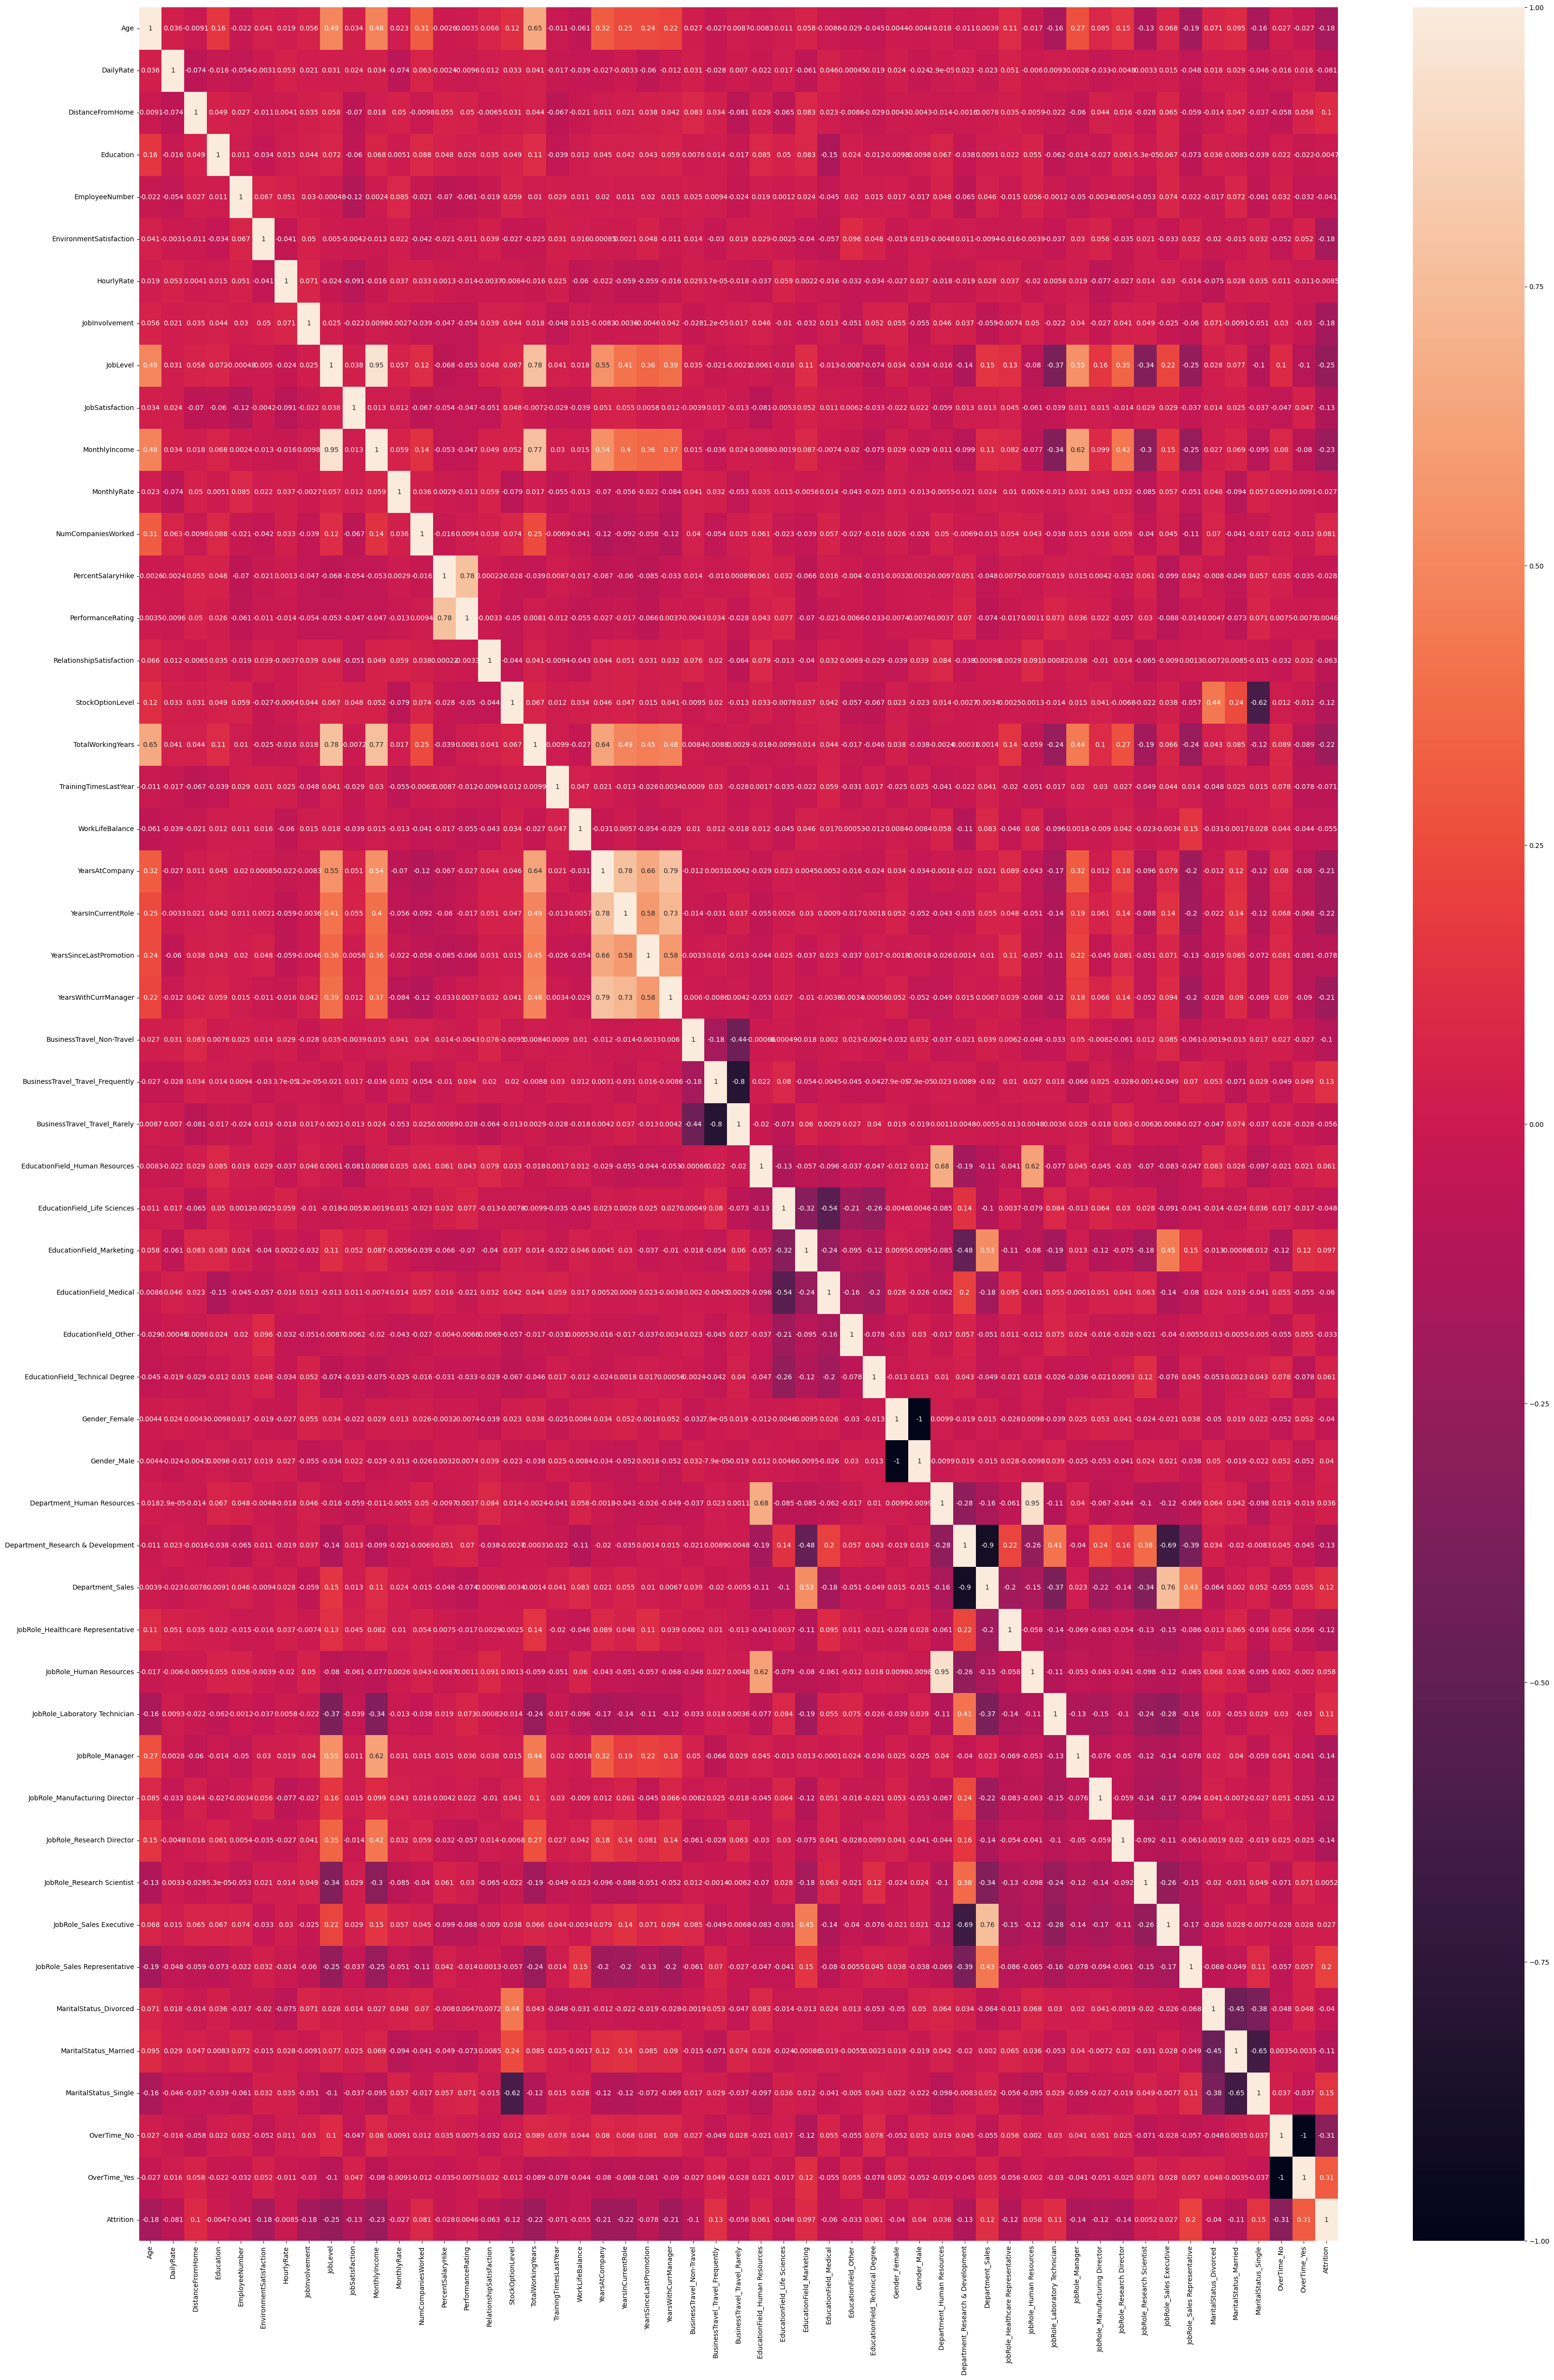

In [22]:
plt.figure(figsize=(40,60))
sns.heatmap(df_over.corr(),annot= True, vmin= -1 , vmax= 1)


<AxesSubplot: xlabel='MonthlyIncome', ylabel='Count'>

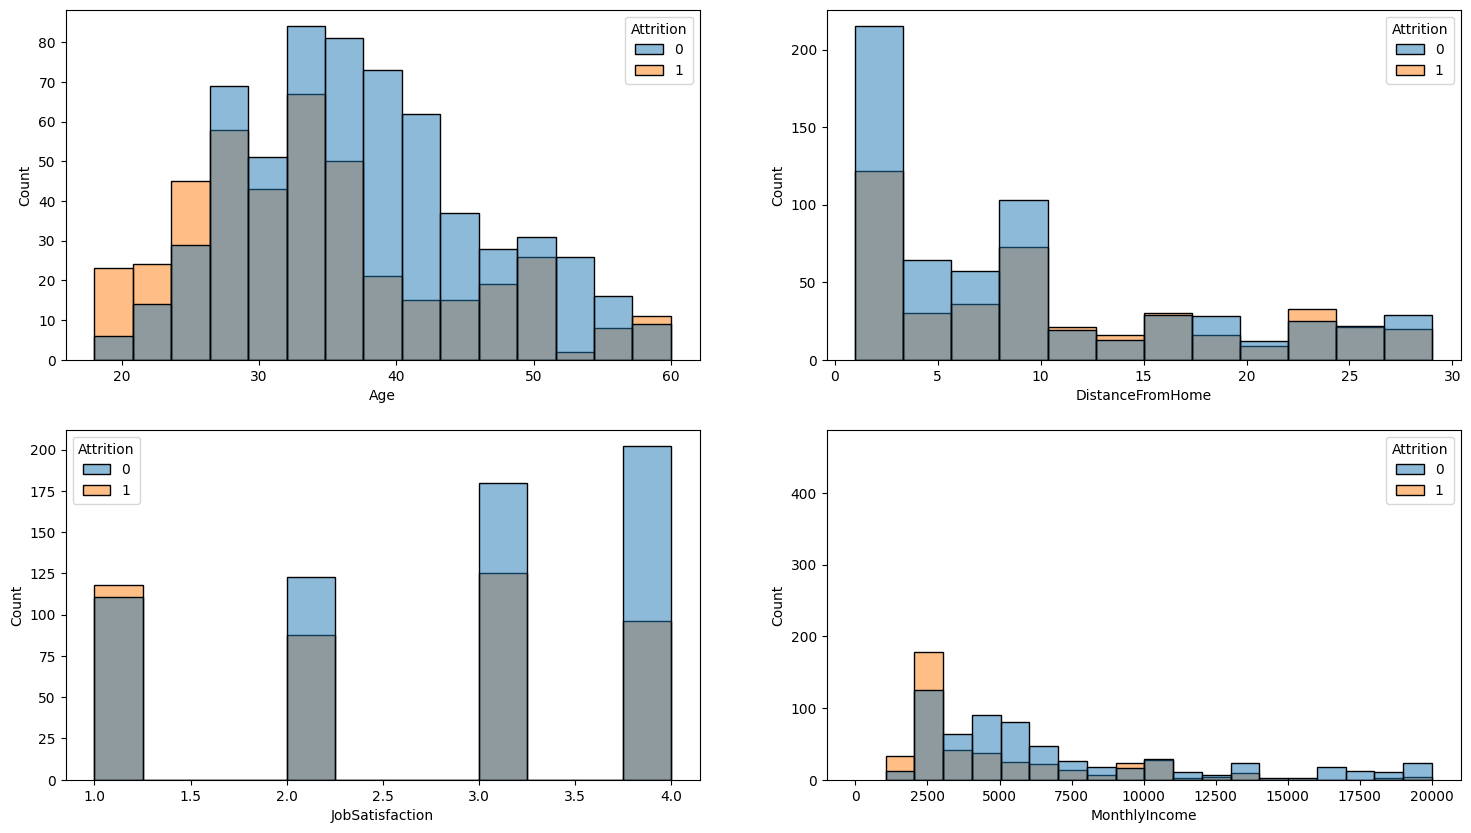

In [21]:

fig, ax = plt.subplots(2,2,figsize=(18,10))
sns.histplot(data=df_over ,x='Age',hue='Attrition',bins=15,ax=ax[0,0]) 
sns.histplot(data=df_over,x='DistanceFromHome', hue = 'Attrition', ax=ax[0,1])
sns.histplot(data=df_over,x='JobSatisfaction',hue='Attrition',ax=ax[1,0])
sns.histplot(data=df_over,x='MonthlyIncome',hue='Attrition',ax=ax[1,1])
sns.histplot(data=df_over,x='OverTime_Yes',hue='Attrition',ax=ax[1,1])

In [ ]:
#sns.pairplot(data = df_over,hue= "Attrition")

## MODELS TRAINING


### NAIVE BAYES

In [ ]:
#Create a Gaussian Classifier
NB = MultinomialNB()

# Train the model using the training sets
NB.fit(X = X_train,y = y_train)
NB_predict = NB.predict(X_test)
print(classification_report(y_test, NB_predict))


              precision    recall  f1-score   support

           0       0.63      0.45      0.52       204
           1       0.43      0.62      0.51       141

    accuracy                           0.52       345
   macro avg       0.53      0.53      0.52       345
weighted avg       0.55      0.52      0.52       345



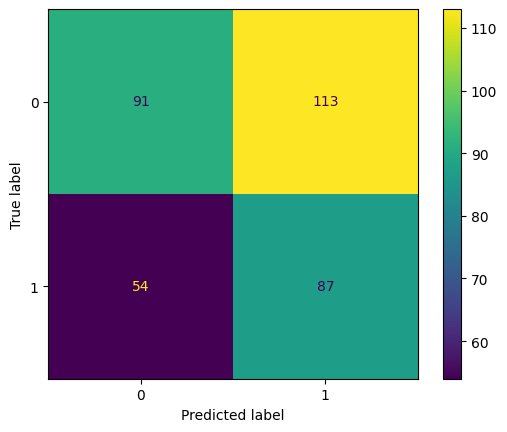

In [ ]:
predictions = NB.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
disp.plot()
plt.show()

## Random Forest


In [ ]:
#Os valores de "n_estimators" e "max_features" foram retirados de uma pesquisa postada no google scholar
random_forest = RandomForestClassifier(max_features = "sqrt", n_estimators = 300 , random_state= 4)
random_forest.fit(X= X_train, y= y_train)
rfc_predict = random_forest.predict(X= X_test)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       204
           1       0.91      0.88      0.90       141

    accuracy                           0.92       345
   macro avg       0.92      0.91      0.91       345
weighted avg       0.92      0.92      0.92       345



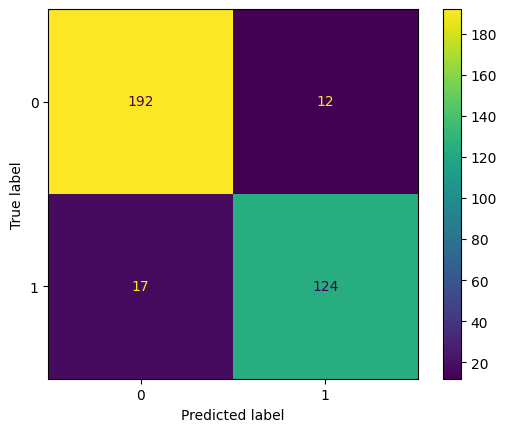

In [ ]:
predictions = random_forest.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp.plot()
plt.show()

### DECISION TREE

In [ ]:
DT = DecisionTreeClassifier(random_state=2024)
# Train the model using the training sets
DT.fit(X = X_train,y = y_train)
DT_predict = DT.predict(X_test)
print(classification_report(y_test, DT_predict))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       204
           1       0.72      0.87      0.78       141

    accuracy                           0.81       345
   macro avg       0.80      0.81      0.80       345
weighted avg       0.82      0.81      0.81       345



In [ ]:
decisionTree_params = {'criterion':['gini', 'entropy', 'log_loss']}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state= 4),decisionTree_params,verbose=1,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(classification_report(y_test, pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       204
           1       0.73      0.89      0.80       141

    accuracy                           0.82       345
   macro avg       0.82      0.83      0.82       345
weighted avg       0.84      0.82      0.82       345



In [ ]:
gs.best_score_

0.7564809333530661

In [ ]:
gs.best_params_

{'criterion': 'entropy'}

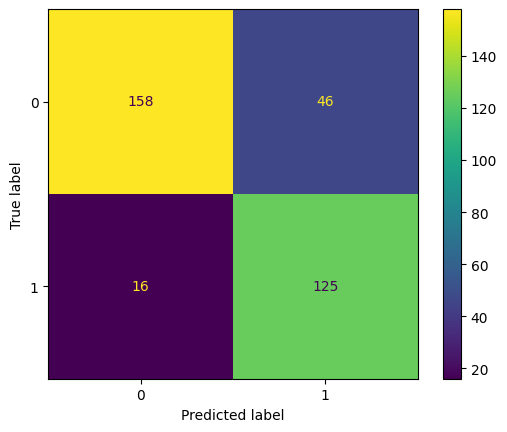

In [ ]:
predictions = gs.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs.classes_)
disp.plot()
plt.show()